# Machine Learning fundamentals

## What is Machine Learning?

One sentence: Machine learning is teaching a machine to learn from data.

Machine learning is teaching a machine to learn from data. This means programmers aren't needed to explicity do tasks, instead large amounts of data is fed into the machine and the machine uses algorithmns to identify patterns within the data. Using the patterns the machine creates a model that is used to make predictions or carry out tasks without being explicity told to do those tasks.

Machine learning model: A statistical representation of real-world process based on data


## How do you make the machine learn? The machine learning workflow:
1. Data collection
2. Data preparation: clean data and preprocess the data. stat+ plots are helpful. Split the data into train and test.
3. Train the model: Uses training data to train the model. The machine makes a model using machine learning algorithm
4. Evaluate the model
5. Deploy machine's model

## Types of Machine learning
Depending on the data you have to teach the machine differently. 
1. Supervised learning: labelled data
2. Unsupervised learning: unlabelled data
3. Reinforcement learning

### Supervised learning
This is where the data you have has an input and a corresponding output. The machine then thinks of how to go from input to output. This means that when you give it new input it can map to a new output.

Example applications: Say you want to separate things into classes like spam and predict numerical things like stock prices.

## Types of Machine learning
Depending on the data you have to teach the machine differently. 
1. Supervised learning: labelled data
2. Unsupervised learning: unlabelled data
3. Reinforcement learning

### Supervised learning
This is where the data you have has an input and a corresponding output. The machine then thinks of how to go from input to output. This means that when you give it new input it can map to a new output.

Example applications: Say you want to separate things into classes like spam and predict numerical things like stock prices.

## Easy Supervised ML project: The famous Iris flowers dataset
This project sources data from the iris data set: https://archive.ics.uci.edu/dataset/53/iris
We can follow the machine learning workflow we described.

Other sources of reference for this: 
- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
- https://www.kaggle.com/code/mohamedtarek111/iris-classification-with-100-acc/notebook 


## 1. Data Collection 

Some useful questions to ask when collecting data is:
- What data is relevant?
- How was the data sampled?
- How can we clean the data?
- Are there privacy issues?

In [1]:
import pandas as pd

# Import iris flower dataset
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'] 
df_iris=pd.read_csv('iris/Iris.csv',names=columns)


## 2. Data preparation
Once we've loaded the data in, it's good to look at the data and understand the data from multiple angles by describing using stats and visualising the data.

### Describing data using stats

In [2]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Check for any null values
df_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [4]:
# This tells us how many flowers are in each class
df_iris.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualising the data
There are two typs of plots we are going to look at: univariate and multivariate. 
1. Univariate look at relationship of one variable. Examples: histograms, bar charts, pie charts and box plots.
2. Multivariate look at relationships between two or more variables. Example: scatter plot matrix

#### Univariate plots

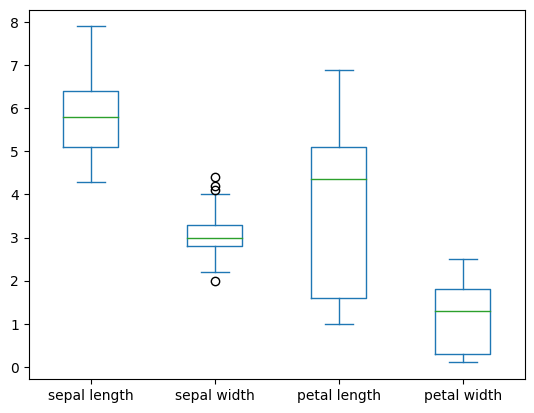

In [5]:
import matplotlib.pyplot as plt

# box and whisker plot
df_iris.plot(kind='box',layout=(2,2))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

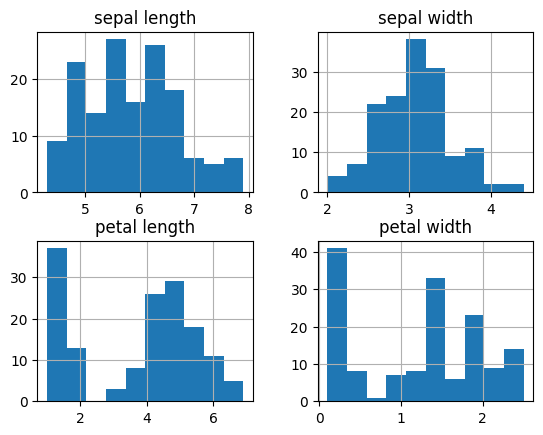

In [6]:
df_iris.hist()
plt.show

#### Multivariate plots

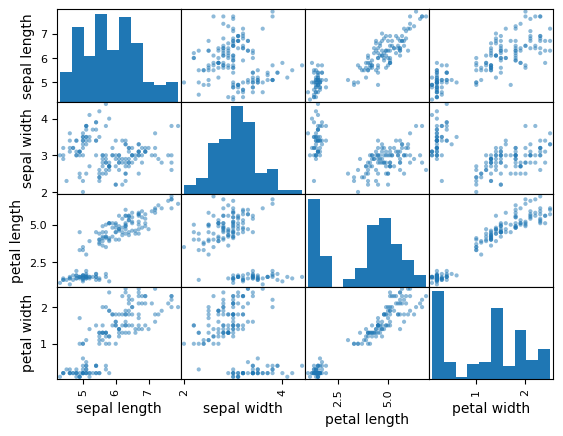

In [7]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(df_iris)
plt.show()

### Split the data
Split the data into a training set and testing set. The training set is used to train the model and the remaining 20% is used as test data. This test data will be used in the validation stage to see how accurate the model is.

In [8]:
from sklearn.model_selection import train_test_split

# Devide data into  
X=df_iris.iloc[:,:-1]
y=df_iris.iloc[:,-1]

#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

## 3. Train the model

It's unclear which algorithmn to use for this dataset so we should try different algorithm and evaluate which one is best.

Linear:
- Logistic Regression (LR): models chances of an instance being in a class by using a line with the logistic sigmoid function.
    - **Anaology**: Imagine you have two types of fruits, apples and oranges, and you want to separate them based on their size and color. Logistic Regression draws an imaginary line that divides the fruits into two groups, apples on one side and oranges on the other (Anaology made using AI)

- Linear Discriminant Analysis (LDA): finds the best direction that separates the classes and projects the data onto that direction.
    - **Anaology**: Let's say you have a bunch of toys, like cars, dolls, and balls, and you want to sort them into different boxes. LDA finds the best way to tilt the boxes so that when you drop the toys, they separate into the correct boxes based on their shapes and sizes (Anaology made using AI)

Non-linear: 
- K-Nearest Neighbors (KNN): finds the closest neighbours (most similar)
    - **Anaology**: Imagine you have a new toy, and you want to know if it's a car, a doll, or a ball. KNN looks at the toys that are most similar to your new toy (the K nearest neighbors) and puts your new toy in the same group as the majority of those similar toys.(Anaology made using AI)
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))


We will split the data into 10 parts where the data is trained on 9 parts and tested on 1. 

Stratified means that each split has the same distribution of examples by class. This helps prevent any single fold from being biased towards certain classes and ensures that each fold is representative of the overall data distribution.


The random_state argument is set to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset. This ensures reproducibility and a fair comparison between different machine learning algorithms, it is important that all algorithms are evaluated on the same splits of the training data. The random_state argument is a parameter that allows you to set the starting point (seed) for the random number generator used in the shuffling and splitting process. This will produce the same sequence of random numbers every time, resulting in the same shuffling and splitting of the dataset.


The scoring argument is set to ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate)

## 4. Evaluate the model

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogisticRegression: 0.941667 (0.065085)
LinearDiscriminantAnalysis: 0.975000 (0.053359)
KNeighborsClassifier: 0.958333 (0.041667)
DecisionTreeClassifier: 0.908333 (0.078617)
GaussianNB: 0.941667 (0.065085)
SVC: 0.966667 (0.040825)


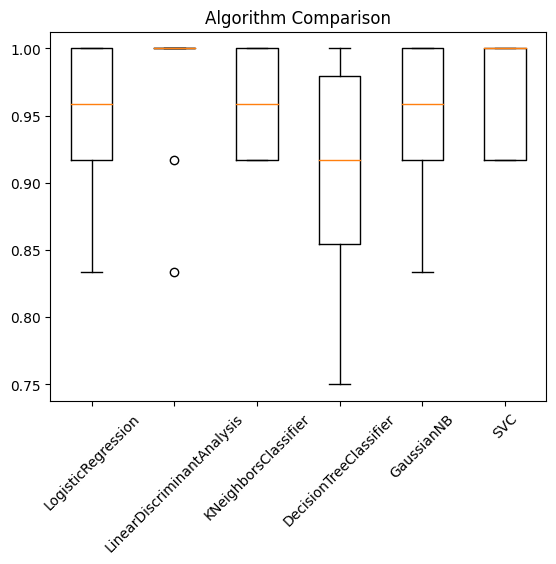

In [11]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xticks(rotation=45)
plt.show()

## 5. Deploy the model
The resutls of the LinearDiscriminantAnalysis look strange, so the next best model SVC is selected and used to make the prediction.

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# creates an instance of the Support Vector Classifier (SVC) model 
model = SVC(gamma='auto')
# This line trains the SVC model using the training data
model.fit(X_train, y_train)
# The trained model is used to make predictions on the test data X_test
predictions = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Unsupervised learning

Unsupervised learning is where we have no output, so we only have input and it's up to the algorithmn to tell us something interesting about the data. It's usually used in the data exploration stage. In supervised we can check if we predicted the data correctly, but in unsupervised learning this is not possible as we don't know the answer.

There are three types of Unsupervised learning:
- Clustering: finds subgroups in data
- Dimensionality Reduction: reduce dimensionality in data
- Association rules: uncovers rules within the data e.g. if X then Y

## Easy Unsupervised ML project: Bank marketing
"The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)."



## 1. Data collection

The project sources data from: https://archive.ics.uci.edu/dataset/222/bank+marketing.

I've followed along this kaggle post for reference: https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide/notebook#Clustering

In [56]:
import pandas as pd

df_bank = pd.read_csv('bank+marketing/bank-additional/bank-additional-full.csv', sep=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Data preparation

In [57]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


We can use the one-hot encoding method to convert categorical variables into numeric data. This will create a new column for each category of each feature.


In [58]:
df_bank_dummy = pd.get_dummies(df_bank)
df_bank_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


As we are dealing with distance metric, we will apply scaling. We scale the features to prevent certain features from dominating the distance calculation due to their larger numeric ranges. The standardization process ensures that all features have a mean of 0 and a standard deviation of 1. Ensures all features contribute equally to the distance calculation, regardless of their original scales or units

In [59]:
from sklearn.preprocessing import StandardScaler

# # Scaling the data
scaler = StandardScaler()
df_bank_scaled = scaler.fit_transform(df_bank_dummy)
df_bank_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

## 3. Training the model

The code below creates an instance of KMeans class. The n_clusters parameter will try to cluster the data into two groups.
The scaledd ata is then fed to the model by using fit().
After fitting, you can use the model to predict new data points by using predict.

Sure, here's a simplified explanation of how the K-means algorithm works, written in Markdown format:

The K-means algorithm is an iterative clustering algorithm that aims to partition a dataset into K distinct clusters:

1. **Initialization**
   - The algorithm starts by randomly selecting K data points from the dataset as the initial cluster centroids (centers).

2. **Assignment Step**
   - Each data point in the dataset is assigned to the nearest centroid based on a distance metric, typically the Euclidean distance.
   - This step creates K clusters, where each data point belongs to the cluster with the nearest centroid.

3. **Update Step**
   - After assigning all data points to clusters, the centroids are updated by calculating the mean of all data points in each cluster.
   - The new centroids are the means of the clusters formed in the previous step.

4. **Iteration**
   - Steps 2 and 3 are repeated until the centroids stop changing significantly or a maximum number of iterations is reached.
   - In each iteration, data points are reassigned to the nearest new centroid, and centroids are recomputed based on the new cluster memberships.

5. **Convergence**
   - The algorithm converges when the centroids stop changing significantly between iterations or when the maximum number of iterations is reached.
   - The final centroids represent the centers of the K clusters, and each data point is assigned to the cluster with the nearest centroid.

The goal of the K-means algorithm is to minimize the sum of squared distances between each data point and its assigned centroid, known as the inertia or within-cluster sum of squares (WCSS). This is achieved by iteratively reassigning data points to the nearest centroids and recomputing the centroids until convergence.

It's important to note that the K-means algorithm is sensitive to the initial centroid positions and can converge to different solutions for different runs. To mitigate this, the algorithm is often run multiple times with different initial centroids, and the solution with the lowest inertia is chosen.

The K-means algorithm works well for spherical or globular clusters but may struggle with non-convex or elongated clusters. Additionally, the number of clusters K must be specified beforehand, which can be a limitation if the optimal number of clusters is unknown.

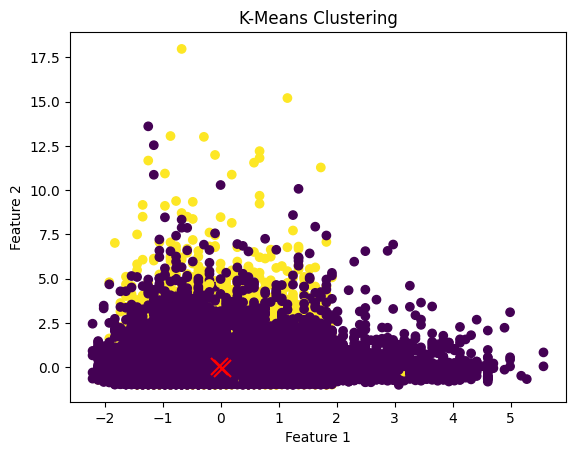

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# # Perform k-means clustering
k_means = KMeans(n_clusters=2, random_state=42) # Random state for reproducibility
clusters = k_means.fit_predict(df_bank_scaled)


plt.scatter(df_bank_scaled[:, 0], df_bank_scaled[:, 1], c=clusters)
# The red cross is the  coordinates of the cluster centroids
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=150, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


 ## 4. Evaluate the model
 The inertia (sum of squared distances of samples to their closest cluster center) of the k-means model can be used as a measure of the model

In [73]:
# Evaluate the clustering
print(f'Inertia (Sum of Squared Distances): {k_means.inertia_:.2f}')


Inertia (Sum of Squared Distances): 2469792.36


How to find optimal number of clusters (K)?
Elbow Curve method - We run the model across a range of clusters, calculate average distances to the centroid across all data points and use the number where there is the greatest drop.

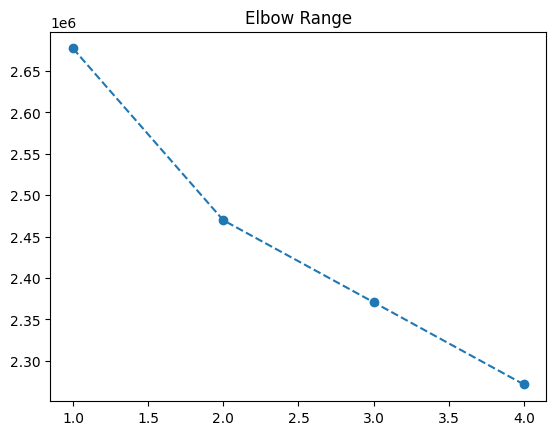

In [74]:
ssd = []

for k in range(1,5):
    model = KMeans(n_clusters=k)
    model.fit(df_bank_scaled)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

plt.plot(range(1,5),ssd,"o--")
plt.title("Elbow Range")
plt.show()